In [1]:
import pandas as pd
import tweepy as tw
import numpy as np

In [6]:
import sqlite3

In [10]:
from tweepy import Stream

In [ ]:
from tweepy import StreamListener

In [29]:
import matplotlib.pyplot as plt

In [2]:
import nltk

In [35]:
from textblob import TextBlob

In [30]:
import seaborn as sns

In [ ]:
from nltk.corpus import stopwords

In [2]:
import string

In [ ]:
from langdetect import detect

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
from urllib3.exceptions import HTTPError

In [67]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
#matplotlib inline

In [3]:
ckey = ""

In [4]:
cskey = ""

In [5]:
akey = ""

In [6]:
askey = ""

In [ ]:
auth = tw.OAuthHandler(ckey, cskey)

In [ ]:
auth.set_access_token(akey, askey)

In [10]:
api = tw.API(auth)

NameError: name 'auth' is not defined

In [7]:
database = sqlite3.connect("ISRO.db")

In [8]:
cur = database.cursor()

In [104]:
search ="#ISRO"

In [107]:
class Listener(StreamListener):
    def on_status(self, status):
        if hasattr(status, "retweeted_status"):  # Check if Retweet
            try:
                text = status.retweeted_status.extended_tweet["full_text"]
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Retweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
            except AttributeError:
                text = status.retweeted_status.text
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Retweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
        else:
            try:
                text = status.extended_tweet["full_text"]
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Tweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()
            except AttributeError:
                text = status.text
                location = status.user.location
                username = status.user.screen_name
                t_time = status.created_at
                re = "Tweet"
                cur.execute('''INSERT INTO Tweetss (Tweet_time, Name,Tweet_status,Location, Tweet) VALUES (?,?,?,?,?)''',(t_time, username, re, location,text))
                database.commit()

In [108]:
lis = Listener()


In [109]:
mystream = tw.Stream(auth = api.auth, listener=lis)
mystream.filter(track = [search])

KeyboardInterrupt: 

In [9]:
sql = "SELECT * from Tweets"
cur.execute(sql)

In [10]:
english_tweet = []
tweet_len = []
Time = []
Name = []
Tweet_status = []
Location = []

In [11]:
count = 0
while True:
    record = cur.fetchone()
    if record[4] == None:
        break
    temp = ''.join(record[4])
    count =count +1
    english_tweet.append(temp)
    tweet_len.append(len(temp))
    Time.append(record[0])
    Name.append(record[1])
    Tweet_status.append(record[2])
    try:
        loc = ''.join(record[3])
        Location.append(loc)
    except:
        Location.append("NaN")

TypeError: 'NoneType' object is not subscriptable

In [81]:
tweet_df = pd.DataFrame(data =list(zip(Time, Name, Tweet_status, english_tweet,tweet_len, Location)), columns = ['Time','Name','Tweet_status','Text', 'Length','Location'])

In [13]:
record

In [84]:
tweet_df.describe()

,Length
count,4849.000000
mean,222.511033
std,65.451736
min,12.000000
25%,167.000000
50%,245.000000
75%,276.000000
max,385.000000


In [16]:
def text_processing(mess = ''):
    nopunc = [char for char in mess.split() if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostop = ' '.join(nostop)
    string = [word for word in nostop.split() if nostop ]
    return nostop


In [5]:
tweet_df['Text'] = tweet_df['Text'].apply(text_processing)

NameError: free variable 'string' referenced before assignment in enclosing scope

In [23]:
dtweet_df

,Unnamed: 0,Time,Name,Tweet_status,Text,Length,Location
0,0,08-09-19 5:58,sureshmahesh786,Retweet,Theres nothing like failure science experiment...,215,India
1,1,08-09-19 5:58,Kanpurhunk,Retweet,Upcoming ISRO Missions gt STROSTgt ditya L1 mi...,167,NaN
2,2,08-09-19 5:58,ankit11101,Retweet,Space hard commend ISROs attempt land Chandray...,245,NaN
3,3,08-09-19 5:58,kulsaurabh1,Retweet,Hello Pallav BaglaNDTVHes politiciancriminal u...,308,"Rahu, Pune, Maharashtra"
4,4,08-09-19 5:58,Sai2641,Retweet,Chandrayaan2 mission highly complex mission re...,251,NaN
5,5,08-09-19 5:58,matt_herdy,Retweet,Dont hate Good things look comment section ful...,150,"London, England"
6,6,08-09-19 5:58,tripathi622,Retweet,peaceforchange ISRO holds World Record launch ...,311,Prayagraj bharat
7,7,08-09-19 5:58,KapilSi11509302,Tweet,Really entire Nation ISRO go ahead mission proud,83,India
8,8,08-09-19 5:58,Congress_Army,Tweet,must kicked,21,NaN
9,9,08-09-19 5:58,Tomboy_Diaries,Retweet,Sometimes dont land arrive destination want im...,250,"New Delhi, India"


In [10]:
temp = tweet_df.drop_duplicates(subset="Text")

NameError: name 'tweet_df' is not defined

In [41]:
tweet_df.to_csv('WithoutDuplicate3.csv')

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


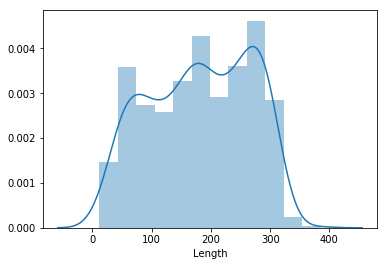

In [102]:
sns.distplot(temp['Length'])

In [3]:
tweet_df = pd.read_csv("WithoutDuplicate3.csv")

In [14]:
tweet_df

,Time,Name,Tweet_status,Text,Length,Location
0,08-09-19 5:58,sureshmahesh786,Retweet,Theres nothing like failure science experiment...,215,India
1,08-09-19 5:58,Kanpurhunk,Retweet,Upcoming ISRO Missions gt STROSTgt ditya L1 mi...,167,NaN
2,08-09-19 5:58,ankit11101,Retweet,Space hard commend ISROs attempt land Chandray...,245,NaN
3,08-09-19 5:58,kulsaurabh1,Retweet,Hello Pallav BaglaNDTVHes politiciancriminal u...,308,"Rahu, Pune, Maharashtra"
4,08-09-19 5:58,Sai2641,Retweet,Chandrayaan2 mission highly complex mission re...,251,NaN
5,08-09-19 5:58,matt_herdy,Retweet,Dont hate Good things look comment section ful...,150,"London, England"
6,08-09-19 5:58,tripathi622,Retweet,peaceforchange ISRO holds World Record launch ...,311,Prayagraj bharat
7,08-09-19 5:58,KapilSi11509302,Tweet,Really entire Nation ISRO go ahead mission proud,83,India
8,08-09-19 5:58,Congress_Army,Tweet,must kicked,21,NaN
9,08-09-19 5:58,Tomboy_Diaries,Retweet,Sometimes dont land arrive destination want im...,250,"New Delhi, India"


In [39]:
tweet_df['Text'] = tweet_df['Text'].str.replace('http\S+|www.\S+', '', case=False)

In [40]:
text_df = []
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
for i in tweet_df['Text']:
    text_df.append(emoji_pattern.sub(r'', i))

In [53]:
count = 1
for i in text_df:
    
    tweet_df.replace({'Text', count}, i, inplace = True)
    count= count +1

In [33]:
tweet_df.to_csv('WithoutDuplicate2.csv')

In [72]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

In [14]:
df = pd.read_csv("FinalDataSet.csv")

In [36]:
senti = []
for i in df['Text']:
    senti.append(TextBlob(i).sentiment)

In [37]:
senti

[Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666),
 Sentiment(polarity=0.10416666666666666, subjectivity=0.5208333333333333),
 Sentiment(polarity=-0.3, subjectivity=0.4),
 Sentiment(polarity=0.325, subjectivity=0.525),
 Sentiment(polarity=0.0, subjectivity=0.5),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.5, subjectivity=0.8888888888888888),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.05, subjectivity=0.0),
 Sentiment(polarity=0.43333333333333335, subjectivity=0.5),
 Sentiment(polarity=0.26666666666666666, subjectivity=0.7999999999999999),
 Sentiment(polarity=0.24444444444444446, subjectivity=0.688888888888889),
 Sentiment(polarity=0.7666666666666666, subjectivity=0.6),
 Sentiment(polarity=0.32857142857142857, subjectivity=0.3357142857142857),
 Sentiment(polarity=0.0, subjectivity=0.0),
 

In [38]:
len(senti)

1166

In [39]:
len(df)

1166

In [40]:
senti_df = pd.DataFrame(senti, columns = ['polarity', 'subjectivity'])

In [41]:
senti_df.head()

,polarity,subjectivity
0,0.800000,1.000000
1,0.000000,0.000000
2,0.800000,1.000000
3,-0.291667,0.541667
4,0.104167,0.520833


In [42]:
df =pd.concat([df, senti_df],axis =1)

In [43]:
df.head()

,Unnamed: 0,Time,Name,Tweet_status,Text,Length,Location,polarity,subjectivity
0,0,2019-09-08 05:58:03,sureshmahesh786,Retweet,there noth like failur science experi amp ...,215,India,0.800000,1.000000
1,1,2019-09-08 05:58:03,Kanpurhunk,Retweet,upcom #isro missions gt astrosat gt adity...,167,NaN,0.000000,0.000000
2,2,2019-09-08 05:58:04,iNikulchaudhary,Retweet,don t be so proud at my height I am hindustan...,148,"गुजरात, भारत",0.800000,1.000000
3,3,2019-09-08 05:58:05,ankit11101,Retweet,space hard commend attempt land #chandrayaan ...,245,NaN,-0.291667,0.541667
4,4,2019-09-08 05:58:05,kulsaurabh1,Retweet,hello pallav bagla ndtv he politician crimin ...,308,"Rahu, Pune, Maharashtra",0.104167,0.520833


In [47]:
df.to_csv('FinalDataSet3.csv')

In [45]:
df = pd.read_csv("FinalDataSet.csv")

FileNotFoundError: [Errno 2] File b'FinalDataSet3.csv' does not exist: b'FinalDataSet3.csv'

In [4]:
df['Text'] = df['Text'].str.replace('@\S+', '', case=False)

In [8]:
df['Text'][21]

'    Modi came Bengaluru neither visited flood affected areas discussed #floodrelief visits Karnataka twice day elections! Shameless BJP! #100DaysNoVikas '

In [25]:
df['Text'] = df['Text'].str.replace(string.punctuation, ' ', case=False)

error: multiple repeat at position 10

In [22]:
import string

In [26]:
df['Text'] = df['Text'].str.replace("[^a-zA-Z#]", " ")

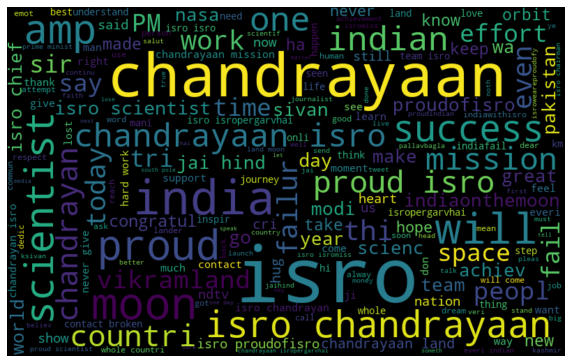

In [33]:
all_words = ' '.join([text for text in df['Text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

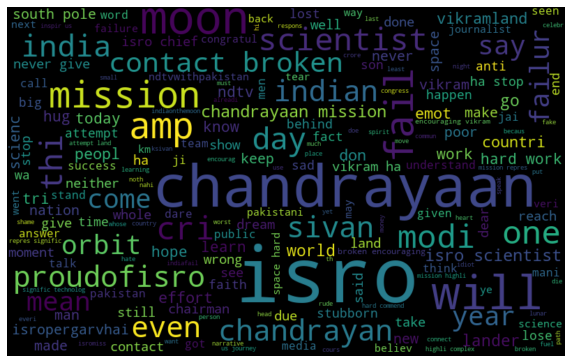

In [50]:
negative_words = ' '.join([text for text in df['Text'][df['polarity']< 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
status = []
for i in df['polarity']:
    if i<0:
        status.append("negative")
    else:
        status.append("positive")

In [52]:
df['polarity'] = status

In [53]:
df.head()

,Unnamed: 0,Time,Name,Tweet_status,Text,Length,Location,polarity,subjectivity
0,0,2019-09-08 05:58:03,sureshmahesh786,Retweet,there noth like failur science experi amp ...,215,India,positive,1.000000
1,1,2019-09-08 05:58:03,Kanpurhunk,Retweet,upcom #isro missions gt astrosat gt adity...,167,NaN,positive,0.000000
2,2,2019-09-08 05:58:04,iNikulchaudhary,Retweet,don t be so proud at my height I am hindustan...,148,"गुजरात, भारत",positive,1.000000
3,3,2019-09-08 05:58:05,ankit11101,Retweet,space hard commend attempt land #chandrayaan ...,245,NaN,negative,0.541667
4,4,2019-09-08 05:58:05,kulsaurabh1,Retweet,hello pallav bagla ndtv he politician crimin ...,308,"Rahu, Pune, Maharashtra",positive,0.520833


In [57]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [58]:
df.drop("subjectivity", axis =1, inplace = True)

In [64]:
df.to_csv("FinalDataSet4.csv")

In [60]:
length = []
for i in df['Text']:
    text = i.split()
    text_len = len(text)
    length.append(text_len)

In [62]:
df['Length'] = length

In [63]:
df.head()

,Time,Name,Tweet_status,Text,Length,Location,polarity
0,2019-09-08 05:58:03,sureshmahesh786,Retweet,there noth like failur science experi amp ...,23,India,positive
1,2019-09-08 05:58:03,Kanpurhunk,Retweet,upcom #isro missions gt astrosat gt adity...,20,NaN,positive
2,2019-09-08 05:58:04,iNikulchaudhary,Retweet,don t be so proud at my height I am hindustan...,20,"गुजरात, भारत",positive
3,2019-09-08 05:58:05,ankit11101,Retweet,space hard commend attempt land #chandrayaan ...,21,NaN,negative
4,2019-09-08 05:58:05,kulsaurabh1,Retweet,hello pallav bagla ndtv he politician crimin ...,32,"Rahu, Pune, Maharashtra",positive


In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer = CountVectorizer().fit(df['Text'])

In [67]:
print(len(bow_transformer.vocabulary_))

3805


In [68]:
message4 = df['Text'][0]
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 135)	2
  (0, 575)	1
  (0, 823)	1
  (0, 1131)	1
  (0, 1158)	1
  (0, 1312)	1
  (0, 1500)	1
  (0, 1732)	1
  (0, 1763)	1
  (0, 1958)	1
  (0, 2063)	1
  (0, 2258)	1
  (0, 2303)	1
  (0, 2321)	1
  (0, 2653)	1
  (0, 2787)	1
  (0, 2822)	1
  (0, 2962)	1
  (0, 2964)	1
  (0, 3387)	1
  (0, 3760)	1
  (0, 3792)	1
(1, 3805)


In [69]:
print(bow_transformer.get_feature_names()[3000])
print(bow_transformer.get_feature_names()[1234])

september
flat


In [70]:
messages_bow = bow_transformer.transform(df['Text'])

In [71]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (1166, 3805)
Amount of Non-Zero occurences:  20262


In [76]:
temp =0

The number of zero-valued elements divided by the total number of elements (e.g., m × n for an m × n matrix) is called the sparsity of the matrix (which is equal to 1 minus the density of the matrix).

In [77]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [78]:
sparsity

0.4566979892395805

In [79]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [80]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 3792)	0.13640611487403553
  (0, 3760)	0.16735565561200932
  (0, 3387)	0.19446061122751476
  (0, 2964)	0.13671206321471344
  (0, 2962)	0.22625256322286888
  (0, 2822)	0.2159246004491072
  (0, 2787)	0.3078553776409948
  (0, 2653)	0.11639643359117927
  (0, 2321)	0.23116977723172438
  (0, 2303)	0.2951371376835009
  (0, 2258)	0.175415974730845
  (0, 2063)	0.2951371376835009
  (0, 1958)	0.175415974730845
  (0, 1763)	0.175415974730845
  (0, 1732)	0.05391368219053434
  (0, 1500)	0.18813421468833888
  (0, 1312)	0.3078553776409948
  (0, 1158)	0.17691474059229773
  (0, 1131)	0.24302955606461263
  (0, 823)	0.1739663576891143
  (0, 575)	0.14440549758241503
  (0, 135)	0.3102006902146216


In [82]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['isro']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['sack']])

1.2195083500481336
6.452753719852455


In [83]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(1166, 3805)


In [105]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, df['polarity'])

In [89]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df.polarity[0])

predicted: positive
expected: positive


testing data set

In [127]:
test = pd.read_csv("training_set4.csv")

In [132]:
test.head()

,Time,Name,Tweet_status,Text,Length,Location,polarity,subjectivity
0,09-09-19 10:11,pun_naughtyy,Retweet,Space hard commend attempt land #Chandrayaan m...,21,Delhi,negative,0.333333
1,09-09-19 10:11,ajeet0910,Retweet,Vikram spotted one piece come #ISRO entire cou...,10,"New Delhi, India",positive,0.625000
2,09-09-19 10:11,murali772,Retweet,Meaningful words Nothing failure scientific ex...,22,Bangalore,negative,0.437500
3,09-09-19 10:11,kansalsubodh,Retweet,Vikram lander broken Sigh hope Let keep finger...,11,New Delhi,negative,0.400000
4,09-09-19 10:11,urjagan,Retweet,#Vikram single piece tilted position official ...,11,"Rajahmundry, India",negative,0.214286


In [131]:
test.drop("Unnamed: 0.1.1", inplace = True, axis =1)

In [100]:
test_transformer = CountVectorizer().fit(test['Text'])

In [101]:
test_bow = bow_transformer.transform(test['Text'])

In [102]:
print('Shape of Sparse Matrix: ', test_bow.shape)
print('Amount of Non-Zero occurences: ', test_bow.nnz)

Shape of Sparse Matrix:  (405, 3805)
Amount of Non-Zero occurences:  2745


In [104]:
sparsity = (100.0 * test_bow.nnz / (test_bow.shape[0] * test_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [107]:
testidf_transformer = TfidfTransformer().fit(test_bow)

In [108]:
test_tfidf = testidf_transformer.transform(test_bow)

In [109]:
all_predictions = spam_detect_model.predict(test_tfidf)

In [110]:
from sklearn.metrics import classification_report
print (classification_report(test['polarity'], all_predictions))

              precision    recall  f1-score   support

    negative       1.00      0.02      0.05        42
    positive       0.90      1.00      0.95       363

    accuracy                           0.90       405
   macro avg       0.95      0.51      0.50       405
weighted avg       0.91      0.90      0.85       405



In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
print (confusion_matrix(test['polarity'], all_predictions))

[[  1  41]
 [  0 363]]


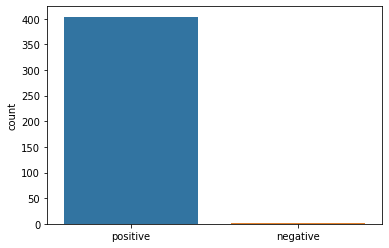

In [113]:
sns.countplot(x=all_predictions)

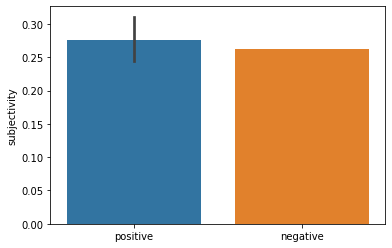

In [115]:
sns.barplot(x = all_predictions, y = test['subjectivity'] )

In [120]:
max(test['Length'])

335

In [122]:
min(test['Length'])

3

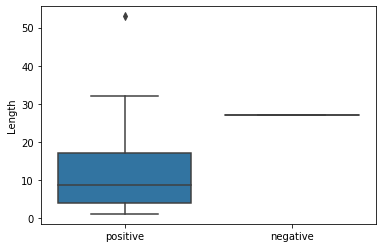

In [133]:
sns.boxplot(x = all_predictions, y = test['Length'])

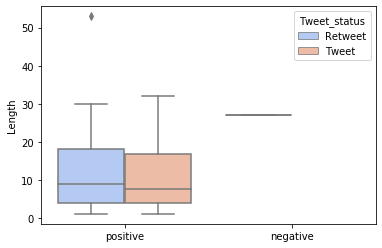

In [134]:
sns.boxplot(x=all_predictions, y="Length", hue="Tweet_status",data=test, palette="coolwarm")